In [0]:
# Change directory to VSCode workspace root so that relative path loads work correctly. Turn this addition off with the DataSciece.changeDirOnImportExport setting
import os
try:
	os.chdir(os.path.join(os.getcwd(), '..'))
	print(os.getcwd())
except:
	pass


In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
def ff(cue,kratio):
    res = np.exp(1j*cue) + kratio
    return np.angle(res)
def circR(samples,axis=None):
    res = np.mean(np.exp(1j * samples), axis=axis)
    return res
def wrap(ang):
    return np.mod(ang+np.pi,2*np.pi) - np.pi

In [3]:
nIter = 10
N=200
M=10
k_prior = 0.5
k_cue = 10

In [4]:
memorys = np.empty((nIter,N,M))
results = np.empty((nIter,N,M))
cues = np.empty((nIter,N,M))

In [5]:
for iIter in range(nIter):
    filename = 'Lengyel2005_discontinuousXj_Loop/'+'Lengyel2005_discontinuousXj_iter%02d.npz'%(iIter)
    D = np.load(filename)
    memorys[iIter] = D['xMemory']
    results[iIter] = D['xRecalled'][:,-1,:]
    cues[iIter] = D['xCues']

In [6]:
memorys = np.mod(memorys,np.pi*2)
results = np.mod(results,np.pi*2)

In [7]:
modes = ['Full','Feedforward','None']

In [8]:
x = {}
x[modes[0]] = results
x[modes[1]] = ff(cues,k_prior/k_cue)
x[modes[2]] = np.zeros_like(results)


In [9]:
dx = {}
for mode in modes:
    dx[mode] = x[mode]-memorys
    dx[mode] = dx[mode].flatten()
    dx[mode] = wrap(dx[mode])


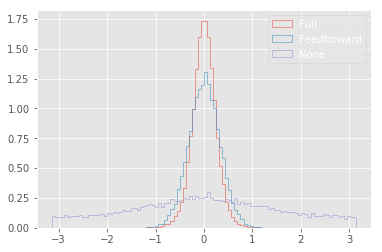

In [10]:
h = {}
for mode in modes:
    h[mode] = plt.hist(dx[mode],100,(-np.pi,np.pi),density=True,histtype='step',label=mode)
    plt.legend()


In [11]:
R = {}
bias= {}
var = {}
lsd = {}
error = {}
for mode in modes:
    lsd[mode] = np.std(dx[mode])
    R[mode] = circR(dx[mode])
    bias[mode] = np.angle(R[mode])
    var[mode] = 1 - abs(R[mode])
    error[mode] = var[mode] + 2*abs(R[mode])*(np.sin(bias[mode]/2)**2)
print('mean bias: \n',bias)
print('linear root mean squared error: \n',lsd)
print('circular variance: \n',var)
print('circular dispersion: \n',error)


mean bias: 
 {'Full': 0.0009478125165873824, 'Feedforward': 0.0009226793191002059, 'None': -0.000832238038642067}
linear root mean squared error: 
 {'Full': 0.25131627254492156, 'Feedforward': 0.3243030058330086, 'None': 1.5338062744986838}
circular variance: 
 {'Full': 0.030890623883242263, 'Feedforward': 0.051171505105234494, 'None': 0.7546183115432609}
circular dispersion: 
 {'Full': 0.03089105918221913, 'Feedforward': 0.05117190899166774, 'None': 0.7546183965214073}
